# Proyecto de Inteligencia Artifical
### Andrés Jiménez Mora, 2017106748
### Moises Salguero Morales, 2017238398

# Descripción del problema

Se busca optimizar la longitud de las extremidades de un manipulador robótico de 4 DoF de forma que la distancia angular recorrida entre cualesquiera 2 puntos de un espacio de trabajo semiesférico de radio r sea mínima.

# Solución

El problema se abordará utilizando computación evolutiva. Sin embargo, antes de pasar a los aspectos propios de inteligencia artificial, se presentarán ciertos fundamentos teóricos respecto a la cinemática de un brazo robótico de 4 DoF. Para comenzar se mostrará un diagrama del manipulador robótico de estudio con sus respectivas variables geométricas.

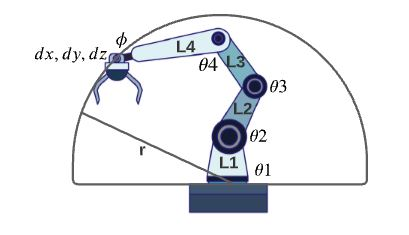

Siendo L1, L2, L3 y L4 las longitudes de los segmentos del manipulador robótico; θ1, θ2, θ3 y θ4 representan los desplazamientos angulares, medidos desde el eje X positivo, de las articulaciones: ϕ corresponde al desplazamiento angular/orientación del efector. Los puntos dx, dy y dz representan las coordenadas del punto final del efector. Por último, r corresponde al radio del espacio de trabajo semiesférico del manipulador.

Para determinar el comportamiento general del sistema, se consultaron varias referencias sobre el modelado de un brazo robótico de 4 DoF a través de la solución algebraica. Con base en [1] y [2] se obtuvieron las siguientes ecuaciones para los ángulos de las articulaciones:

$$
    \theta_{1} = tan^{-1}(\frac{dy}{dx})
$$

$$
    \theta_{2} = tan^{-1}(c,\pm\sqrt{g^2-c^2})-tan^{-1}(a,b)
$$

$$
     \theta_{3} = cos^{-1}(\frac{A^2+B^2+C^2-L2^2-L3^2}{2*L2*L3})
$$

$$
     \theta_{4} = \phi - \theta_{2} - \theta_{3}
$$

Donde:

$$
    a = l_{3}sin(\theta_{3})
$$

$$
    b = l_{2}+l_{3}cos(\theta_{3})
$$

$$
    c = dz - l_{1} - l_{4}sin(\phi)
$$

$$
    g = \sqrt{a^2+b^2}
$$

$$
    A = dx - l_{4}cos(\theta_{1})cos(\phi)
$$

$$
    B = dy - l_{4}sin(\theta_{1})cos(\phi)
$$

$$
        C= dz - l_{1} - l_{4}sin(\phi)
$$

Además, una vez obtenidos los ángulos θ2, θ3 y θ4 se puede obtener el valor de ϕ, donde ϕ corresponde a la orientación del efector, a través de la siguiente ecuación:

$$
    \phi = \theta_{2} + \theta_{3} + \theta_{4}
$$

Finalmente, como restricción sobre las coordenadas espaciales que puede alcanzar el manipulador, se debe de cumplir la
siguiente ecuación:

$$
    r = \sqrt{dx^2+dy^2+dz^2}
$$

### Simplificaciones al modelo matemático


En la solución de este problema se buscarán las longitudes tales que el movimiento angular entre dos puntos sea el mínimo. Existe un ángulo en específico que no es afectado por las longitudes, que es el ángulo $\theta_{1}$. Como se puede observar este ángulo es afectado solamente por la posición final del efector. Además, el valor de $\theta_{1}$ solo depende de las coordenadas dx y dy. Por esta razón, el ángulo $\theta_{1}$ se tomará constante, lo cual simplifica el modelo de una semiesfera a un plano como se muestra en la siguiente figura, el valor de este será 0 para este caso de estudio. 

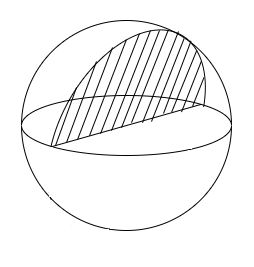

Sin embargo, realizando cálculos experimentales se observó que los puntos que estaban en el primero y segundo cuadrante del plano XY daban como resultado angulos θ2, θ3 y θ4 exactamente iguales, por lo que se decidió que se trabajará de la misma manera con puntos en el eje X positivo o negativo. Esto simplifica aún más el sistema a un plano con forma de cuarto de círculo. Como se muestra a continuación. 

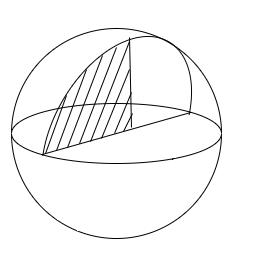
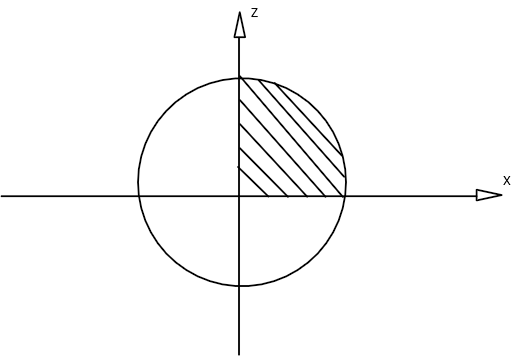


Además, como la orientación final del efector no es relevante para la solución del problema se dejará $\phi$ en 0 en todo momento. 

Fijando el ángulo $\theta_{1}$ en 0, implica que dy debe setearse a 0 en todo momento debido a que se asume un desplazamiento angular de 0 respecto al eje X positivo.


Siendo que $\phi$ es 0 y que $\theta_{1}$ es 0 también, las ecuaciones anteriores se reducen a lo siguiente:

$$
    \theta_{1} = 0
$$

$$
    \theta_{2} = tan^{-1}(c,\pm\sqrt{g^2-c^2})-tan^{-1}(a,b)
$$

$$
     \theta_{3} = cos^{-1}(\frac{A^2+C^2-L2^2-L3^2}{2*L2*L3})
$$

$$
     \theta_{4} = - (\theta_{2} + \theta_{3})
$$

Además, 

$$
    a = l_{3}sin(\theta_{3})
$$

$$
    b = l_{2}+l_{3}cos(\theta_{3})
$$

$$
    c = dz - l_{1} 
$$

$$
    g = \sqrt{a^2+b^2}
$$

$$
    A = dx - l_{4}
$$


$$
        C= dz - l_{1}
$$

### Definición del genotipo y fenotipo

Para definir el genotipo es necesario definir la estructura de los cromosomas que se generarán para este problema. Dado que se requiere optimizar la longitud de los brazos, cada gen del cromosoma se puede asociar a una longitud:

$$
    Cromosoma  [L_{1}, L_{2}, L_{3}, L_{4}]
$$

Para el caso del fenotipo, este viene siendo el brazo robótico perce, con un desempeño específico según la longitud de los brazos dada por un cromosoma específico.

### Definición del espacio de alelos

Para definir el espacio de alelos se van a determinar las restricciones sobre los dominios de las funciones y las longitudes de los enlaces. Comenzando por las restricciones del dominio de la función acos(x):

$$
    -1\leq(\frac{A^2+C^2-L2^2-L3^2}{2*L2*L3})\leq1
$$

Esto implica que:

$$
    -2*L2*L3\leq A^2+C^2-L2^2-L3^2\leq2*L2*L3 \quad (1)
$$

Sobre las restricciones para el dominio de la función atan2, se tiene que:

$$ 
    Si \quad c = 0 \quad  \Rightarrow \quad \sqrt{g^2-c^2} \neq 0  \quad (2)
$$

$$
    Si \quad a = 0 \quad  \Rightarrow \quad b \neq 0  \quad (3)
$$

En cuanto a las longitudes, es importante plantear ciertas limitantes para facilitar el encontrar soluciones:

$$
    L_{1} + L_{2} + L_{3} + L_{4} >= r \quad (4)
$$

$$
    L_{1} + L_{2} + L_{3} + L_{4} <=2r \quad (5)
$$

$$
   L_{n} < r/3 \quad (6)
$$

$$
   L_{n} >= r/10  \quad (7)
$$


Con base en las restricciones anteriores se plantea un espacio de alelos para el problema.

$$
  r/10 <= L_{n} <= r/3
$$

### Definición de la función de calidad

Con el objetivo de simplificar la función de calidad y ahorrar coste computacional, los desplazamientos se van a evaluar en un cuarto de circunferencia, es decir, es de forma bidimensional en lugar de tridimensional. Esta simplificación es posible dado que sus articulaciones, a excepción de θ1, solo pueden rotar de forma planar y por lo tanto, para realizar movimientos tridimensionales debe rotar sobre el eje z y luego rotar el resto de articulaciones. Primeramente se va a definir la distancia angular recorrida por las articulaciones del robot al desplazarse entre 2 puntos cualesquiera del espacio. Dados los puntos P1 y P2:

$$
    P_{1} = (x_{1}, z_{1})
$$

$$
    P_{2} = (x_{2}, z_{2})
$$

Tal que:

$$
    \sqrt{x_{1}^2+z_{1}^2} = r
$$

$$
    \sqrt{x_{2}^2+z_{2}^2} = r
$$

Evaluando los puntos anteriores en las ecuaciones de cinemática inversa se obtienen 2 conjuntos de ángulos para las articulaciones en cada punto:

$$
    \theta_{P1} ( \theta_{P1,1},  \theta_{P1,2},  \theta_{P1,3},  \theta_{P1,4} )
$$

$$
    \theta_{P2} ( \theta_{P2,1},  \theta_{P2,2},  \theta_{P2,3},  \theta_{P2,4} )
$$

La distancia angular se obtiene calculando la diferencia entre cada ángulo de cada articulación:

$$
    \theta_{\delta} ( \theta_{P2.1}-\theta_{P1.1}, \theta_{P2.2}-\theta_{P1.2},  \theta_{P2.3}-\theta_{P1.3}, \theta_{P2.4}-\theta_{P1.4} )
$$


Se van a generar N puntos sobre un cuarto de circunferencia planteado sobre el plano XZ, se va a calcular la distancia angular entre cada una de las M combinaciones posibles de 2 puntos y con base en esto se puede obtener una función de calidad. Adicionalmente, como factor de castigo se utiliza las restricciones planteadas anteriormente.

$$
    Calidad = \frac{1}{\sum_{i=1}^N\sum_{j=1}^M{|\theta_{\delta_{i}}|}}
$$

En caso de que se incumplan las condiciones (4) o (5) se adiciona un factor de castigo u otro, estos a su vez, pasan a ser 1 cuando las condiciones se cumplen, su existencia es condicional:

$$
    Calidad = \frac{1}{\sum_{i=1}^N\sum_{j=1}^M{|\theta_{\delta_{i}}|}} * (\frac{ L_{1} + L_{2} + L_{3} + L_{4}}{1000r^2})*(\frac{1}{(l1+l2+l3+l4 - 2*radio)^2*1000})
$$

La cantidad de puntos que se escogió para evaluar la diferencia entre ángulos fue de 25 en el cuarto de circunferencia mencionado, esto por que al final el costo computacional se vuelve extremadamente grande si se escoge una cantidad mayor de puntos a evaluar. Por lo que esta cantidad de puntos fue la que dio mejores resultados y no tuvo un alto costo computacional. 

## Codificación de la solución

### Importación de librerías

Lo primero que se realiza es instalar las librerías en caso de que se trabaje con Jupyter Notebook, luego se importan como se muestra a continuación. Las librerías más importantes son Pygad y Control que son las librerías que se usan para generar el sistema genético y además, para trabajar los sistemas de control automático respectivamente.

In [2]:
import pygad
import numpy as np
import matplotlib.pyplot as plt
import control as co
from itertools import groupby
from queue import Queue
import random 
import math
import pandas as pd

###  Recibir el radio del área de trabajo

In [3]:
radio = int(input("Digite el radio del área de trabajo en m: "))

Digite el radio del área de trabajo en m: 12


### Calcular los ángulos de las articulaciones para 25 puntos sobre un cuarto de círculo

En la siguiente función se generan 25 puntos que cumplen con la condición del radio de trabajo, con base en dichos puntos se calculan los ángulos para cada articulación del manipulador al alcanzar dichas coordenadas.

In [4]:
def angulos_finales(parametros_sys):
    
    # Se definene variables que son las longitudes generadas por los alelos.
    l1= parametros_sys[0]
    l2= parametros_sys[1]
    l3= parametros_sys[2] 
    l4= parametros_sys[3]
    
    x= np.linspace(0, radio, 25)
    z=[]
    
    angulos= [[],[],[]]
    for i in range(0, len(x)):
        
        # ecuaciones matemáticas que encuentran el ángulo de cada punto generado
        zi=math.sqrt((radio**2)-(x[i]**2))
        z.append(zi)
        A = x[i]-l4
        C = zi-l1
        c = zi -l1
        theta1 = 0
        
        
        theta3 = math.acos(((A**2)+(C**2)-(l2**2)-(l3**2))/(2*l2*l3))
        a = l3*math.sin(theta3)
        b = l2 + l3*math.cos(theta3)
        g = math.sqrt((a**2) + (b**2))
        theta2 = math.atan2(c,(-1*math.sqrt((g**2)-(c**2))))-math.atan2(a,b)
        theta4 = -(theta2 + theta3)
        
        # se añade cada ángulo encontrado a la lista que contiene todos los ángulos. 
        angulos[0].append(theta2)
        angulos[1].append(theta3)
        angulos[2].append(theta4)
        
    return angulos
    
    

### Prueba de la función de ángulos finales 

In [5]:
parametros=[1.2104765,  7.74278999, 7.79664747, 1.20577486]
angulos_finales(parametros)

[[0.8812514559945358,
  0.830415993250797,
  0.7794599039955922,
  0.7833131156430531,
  0.8261532632589035,
  0.8697820209550235,
  0.9142955348830853,
  0.9597995123175158,
  1.006411681932787,
  1.054264892098169,
  1.1035110988413002,
  1.154326612158826,
  1.2069191562243122,
  1.2615376064957802,
  1.3184857907620229,
  1.3781426723276202,
  1.4409929717926906,
  1.5076757268601098,
  1.5790656220770811,
  1.6564190256135412,
  1.741661595232411,
  1.838033112519526,
  1.9518512459641049,
  2.099436932604246,
  -3.830284676072571],
 [1.5945761284571751,
  1.6043581285855681,
  1.6137239347529904,
  1.6226706126605615,
  1.6311927283434946,
  1.6392822103969427,
  1.6469281349929754,
  1.6541164185403108,
  1.6608293951339816,
  1.6670452450359323,
  1.6727372243521772,
  1.6778726215359971,
  1.6824113276281343,
  1.686303843903151,
  1.6894884433219928,
  1.6918870122810357,
  1.6933987457195792,
  1.6938901705699598,
  1.6931784898513218,
  1.6910017901599468,
  1.6869606199707

### Función de calidad y sistema para realizar las pruebas

Se implementan las definiciones establecidas en las sección de planteamientos teóricos sobre la función de calidad.

In [6]:
def fitness_func(solutions_array, solutions__array_idx):
    l1, l2, l3, l4 = solutions_array
    
    try: 
        fit = 0    # calidad de la respuesta
        angulos = angulos_finales(solutions_array)  # llamada a funcion angulos finales
        
        # Sumatoria de los angulos individuales
        sumatoria2 = 0 
        sumatoria3 = 0 
        sumatoria4 = 0 

        for i in range(len(angulos[0])-1): # algoritmo que genera la diferencia de todos los ángulos 
                                            # y realiza la suma de las diferencias 
            suma2 = 0
            suma3 = 0
            suma4 = 0
            for j in range(i+1, len(angulos[0])):

                suma2 = suma2 + abs(angulos[0][i]-angulos[0][j])
                suma3 = suma3 + abs(angulos[1][i]-angulos[1][j])
                suma4 = suma4 + abs(angulos[2][i]-angulos[2][j])


            sumatoria2 = sumatoria2 + suma2 
            sumatoria3 = sumatoria3 + suma3
            sumatoria4 = sumatoria4 + suma4

        sumatoria = sumatoria2 + sumatoria3 + sumatoria4   # sumatoria total de las diferencias
        
        # Cálculo de la función de calidad dependiendo de diversos factores
        
        if(l1<0.1*radio or l2<0.1*radio or l3<0.1*radio or l4<0.1*radio ):
            castigo= 0.00000001
            
        elif(l1>0.65*radio or l2>0.65*radio or l3>0.65*radio or l4>0.65*radio ):
            castigo= 0.00000001

        elif (l1+l2+l3+l4 >= radio and l1+l2+l3+l4 <= 2*radio):

            castigo=1

        elif(l1+l2+l3+l4 < radio): 

            castigo = (l1+l2+l3+l4)/(1000*radio**2)
        else:
            castigo = 1/(((l1+l2+l3+l4 - 2*radio)**2)*1000)

        fit=castigo*(1/sumatoria)
        return fit
    
    except: # este caso se considera debido a que en las funciones definidas puede ocurrir un modelos matemático
            # por no cumplir con los requisitos de un tangente inverso o un coseno inverso o una división. 
            # cuando eso ocurre, se define una calidad muy pequeña. 
        fit=0.00000000001
        return fit
        
   


### Prueba de la función de calidad

In [7]:
longitudes = [1.2104765,  7.74278999, 7.79664747, 1.20577486]
fitness_func(longitudes,0)

0.0019374877455321296

### Función para calcular la sumatoria de las distancias angulares de la mejor solución

Para validar los resultados se realiza una gráfica de "Sumatoria de distancias angular" vs "Generaciones" a finalizar la ejecución del algoritmo. Esta función se encarga de generar una lista 1D con la sumatoria de las distancias angulares de la mejor solución para fungir como el eje Y de la gráfica final.

In [8]:
angulos_generacion = []

def mejor_angulo(solutions_array):
    try: 
    
        angulos = angulos_finales(solutions_array)  # llamada a angulos finales

        sumatoria2 = 0 
        sumatoria3 = 0 
        sumatoria4 = 0 

        for i in range(len(angulos[0])-1):
            suma2 = 0
            suma3 = 0
            suma4 = 0
            for j in range(i+1, len(angulos[0])):

                suma2 = suma2 + abs(angulos[0][i]-angulos[0][j])
                suma3 = suma3 + abs(angulos[1][i]-angulos[1][j])
                suma4 = suma4 + abs(angulos[2][i]-angulos[2][j])


            sumatoria2 = sumatoria2 + suma2 
            sumatoria3 = sumatoria3 + suma3
            sumatoria4 = sumatoria4 + suma4

        sumatoria = sumatoria2 + sumatoria3 + sumatoria4
        angulos_generacion.append(sumatoria) # se añade la suma de todos los angulos a la lista angulos_generacion
    except: 
        angulos_generacion.append(0)

### Parámetros del modelo genético

In [9]:
#Se define la función de calidad
fitness_function = fitness_func


sol_per_pop = 50  # población inicial (cromosomas)
num_genes = 4   # numero de genes (cantidad de constantes de la ecuación)

num_generations = 200  # numero de generaciones creadas
num_parents_mating = int(sol_per_pop*0.25) #int(sol_per_pop*0.25)  # Porcentaje de padres para recombinacion (25%)

init_range_low = radio/10 #límite inferior rango alelos
init_range_high = (radio/3) # limite superior rango alelos

parent_selection_type = "rws"  # el tipo de selección rws es por ruleta
keep_parents =  int(sol_per_pop*0.25)  # cantidad de padres que permanecen en cada generación 

crossover_type = "two_points"

mutation_type = "random"
mutation_percent_genes = 2

fit_queue = Queue(maxsize = 30) # Cola en la que se almacenan ultimos 10 resultados 

### Sección de Callback

El criterio de parada del algoritmo se basa en esperar a que la calidad deje de cambiar, lo que significa que la 
optimización ha llegado a su límite. Para la implentación se definió una lista de tipo FIFO donde se van almacenando 
los últimos 20 resultados del fitness, cuando la lista este llena de resultados iguales entre sí, arroja el "stop" al 
algoritmo genético para terminar la ejecución y mostrar mejor solución alcanzada.

In [10]:
last_fitness =0
numero_generacion = []
calidad_generacion = []

def all_equal(iterable): # funcion que revisa si todos los numeros que le entran son iguales
    g = groupby(iterable)
    return next(g, True) and not next(g, False)

def callback_generation(ga_instance): # Función Callback
    global last_fitness
    # acá se imprimen los datos de la generación y el mejor resultado
    
    print("Generation = {generation}".format(generation=ga_instance.generations_completed)) #generacion
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1])) #mejor calidad de la generacion
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness)) #diferencia entre la calidad actual y la anterior
    print("Best solution: " + str(ga_instance.best_solution()[0]))
    last_fitness = ga_instance.best_solution()[1]
    numero_generacion.append(ga_instance.generations_completed)
    calidad_generacion.append(ga_instance.best_solution()[1])
    mejor_angulo(ga_instance.best_solution()[0])

    if fit_queue.full(): #revision de la cola para averiguar si se cumple la condicion de parada
      fit_queue.get()
      fit_queue.put(last_fitness)
    
      lista = list(fit_queue.queue)
      if all_equal(lista): #revision de que todos los resultados en la lista sean iguales
        print('Las ultimas 30 soluciones son iguales, parando generacion...')
        return 'stop' #senal para que el algoritmo genetico se detenga

    else: #si la cola aun no esta llena
      fit_queue.put(last_fitness) #llenar la cola con el ultimo resultado

### Definición del modelo evolutivo

In [11]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       on_generation=callback_generation,
                       gene_type=float)

C:\Users\moise\Anaconda3\lib\site-packages\pygad\pygad.py:486: UserWarning: The percentage of genes to mutate (mutation_percent_genes=2) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


### Prueba del modelo diseñado 

In [12]:
ga_instance.run()

Generation = 1
Fitness    = 1e-11
Change     = 1e-11
Best solution: [2.86379605 2.73803417 3.26164205 1.9666397 ]
Generation = 2
Fitness    = 1e-11
Change     = 0.0
Best solution: [2.1614227  3.08463206 1.93374908 3.61694662]
Generation = 3
Fitness    = 1e-11
Change     = 0.0
Best solution: [2.45963901 2.45676015 1.73476198 3.31770494]
Generation = 4
Fitness    = 1e-11
Change     = 0.0
Best solution: [2.57856847 3.08463206 2.85742921 2.18788509]
Generation = 5
Fitness    = 1e-11
Change     = 0.0
Best solution: [3.3279732  3.08463206 1.59714131 2.62349668]
Generation = 6
Fitness    = 1e-11
Change     = 0.0
Best solution: [0.30655906 2.61854466 1.83979016 3.31770494]
Generation = 7
Fitness    = 1e-11
Change     = 0.0
Best solution: [2.77443055 2.22281755 3.03524316 3.46024219]
Generation = 8
Fitness    = 1e-11
Change     = 0.0
Best solution: [2.79122428 2.38555333 3.15470235 2.64235444]
Generation = 9
Fitness    = 1e-11
Change     = 0.0
Best solution: [-1.0976868   3.61006694  1.13862609

### Resultados

En esta sección se mostrarán dos gráficas. La primera es de la sumatoria de las distancias angulares en 25 puntos distintos respecto al número de generación en la que se está realizando el análisis. La sumatoria de distancias angulares se refiere a que cada ángulo que se obtivo en los 25 puntos distintos se evaluó en la función de calidad y luego se sacó la diferencia de este con los ángulos de los otros puntos con los que no se había echo el cálculo. Finalmente se realizó la la suma de todas esas diferencias de los 3 ángulos a evaluar y eso es lo que se graficó. 

La segunda gráfica se refiere a la calidad de la mejor solución en cada generación que se evaluó respecto a su generación correspondiente.

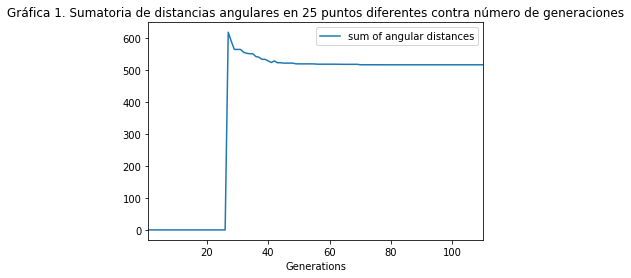

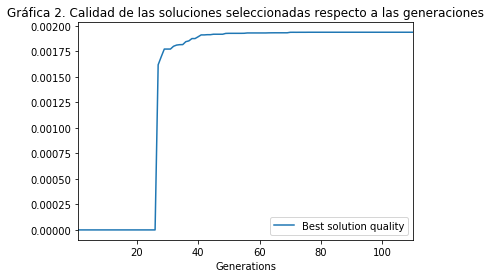

In [13]:
df = pd.DataFrame({'Generations':numero_generacion, 
                   'Best solution quality':calidad_generacion, 
                   'sum of angular distances':angulos_generacion})


fig, ex = plt.subplots()
df.plot(x = 'Generations', y = 'sum of angular distances', ax = ex)
plt.title("Gráfica 1. Sumatoria de distancias angulares en 25 puntos diferentes contra número de generaciones")
plt.show()

fig, ax = plt.subplots()
df.plot(x = 'Generations', y = 'Best solution quality', ax = ax)
plt.title("Gráfica 2. Calidad de las soluciones seleccionadas respecto a las generaciones")
plt.show()

### Análisis de resultados

Si se observa la calidad de las soluciones en la gráfica 2, esta es muy cercana a 0 antes de las primeras 30 generaciones, esto ocurre debido a que en la función de calidad se definió que si ocurre un error matemático se definiera una calidad muy baja. El error matemático se da cuando el conjunto de longitudes que se tienen como solución no resuelven matemáticamente algunas de las ecuaciones que se tienen para encontrar los ángulos. Cuando se estaba probando el algoritmo se encontró que muchas de las soluciones que generaba el algoritmo genético indefinían matemáticamente la función coseno inverso y tangente inverso, a tales soluciones se les asignó una calidad prácticamente de 0. 

Luego de esto, se observa como la calidad aumenta paulatinamente hasta llegar a un máximo en las últimas generaciones, y esas son las soluciones con las que se mantiene. Esto se puede complementar con la gráfica 1 que muestra la sumatoria de las distancias angulares en función de las generaciones. Al inicio la sumatoria de las distancias es 0 por que hubo un error matemático, por lo que se asignó un valor de 0 a todos los ángulos. Luego, cuando la calidad aumenta, es por que no hubo error matemático en el algoritmo y todas las funciones se definene matemáticamente, lo que lleva a que exista la sumatoria angular. Esta es la máxima al inicio, y luego comienza a disminuir llegando a un mínimo, en el cual se mantiene constante el resto de las generaciones. 

Cabe aclarar que los ángulos están en radiantes y que la función que se utilizó para realizar la sumatoria fue el valor absoluto de la diferencia entre dos ángulos, y luego se sumó la diferencia de cada uno de los 25 puntos por cada ángulo. Finalmente se sumaron las sumas de los 3 ángulos evaluados. Es decir, el valor final es una suma de muchas diferencias involucradas por lo que claramente el resultado será muy grande, sin embargo, es una buena manera de evaluar la calidad de el algoritmo. Y además de esto, se llega a un mínimo, optimizando los valores que se utilizaron como soluciones que son las longitudes l1, l2, l3 y l4. 

### Conclusiones 

Se diseñó e implementó un algoritmo genético que logró optimizar eficientemente la longitud de las extremidades de un manipulador robótico de 4 DoF de forma que la distancia angular recorrida entre cualesquiera 2 puntos de un espacio de trabajo semiesférico de radio r fuera mínima.

Se logró simplificar el sistema matemático de un robot de 4DOF de tal manera que sin necesidad de un amplio desarrollo matemático un algotimo genético lograra encontrar las longitudes de sus extremidades para un recorrido angular mínimo en un radio variable. 

Se logró la resolución del problema con resultados lógicos matemática y físicamente.

### Referencias

[1] A. A. Mohammed and M. Sunar, "Kinematics modeling of a 4-DOF robotic arm," 2015 International Conference on Control, Automation and Robotics, 2015, pp. 87-91, doi: 10.1109/ICCAR.2015.7166008.

[2] Y. Luan, W. Xu, J. Li, D. Zhou, H. Wang and H. Ji, "Kinematics Modeling and Simulation of a 4-DOF Manipulator," 2017 International Conference on Computer Systems, Electronics and Control (ICCSEC), 2017, pp. 302-305, doi: 10.1109/ICCSEC.2017.8446769.

[3] A.P. Engelbrecht, '"Computational intelligence: an introduction, second edition,", ed. 2nd ed., 2007.